# Group Project Proposal - Predicting the Winner of a Tennis Match

## Introduction

Tennis is a popular racket sport throughout the world and has a large competitive scene. There are many competitions held throughout the world for tennis, to try to find the best tennis player in the world. Professional tennis players are ranked through the ATP ranking system, awarding points based on their tournament performances. For instance, a player would earn more points for making it deep into a tournament. In this project, we will attempt to answer the question: “Can we predict the winner of a match between two professional players?” The dataset we will be using to create our classification model are the results of games between 2017 and 2019 of the top 500 tennis players. In this dataset, there is information about the various tournaments in the time period, information about the players that played in the tournament, and information about their wins and losses in those tournaments. There is also data about the player’s ATP rank and how many points they gained from each tournament. 


## Preliminary Exploratory Data Analysis

In [2]:
options(repr.matrix.max.rows = 6)

library(tidyverse)
library(repr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [3]:
tennis <- read_csv("tennis.csv", na = c("", "NA"))

## Cleaning and Wrangling
## Data is already tidy
head(tennis)


New names:
• `` -> `...1`
Rows: 6866 Columns: 50
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (16): tourney_id, tourney_name, surface, tourney_level, winner_seed, win...
dbl (34): ...1, draw_size, tourney_date, match_num, winner_id, winner_ht, wi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


...1,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,⋯,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,2019-M020,Brisbane,Hard,32,A,20181231,300,105453,2,⋯,54,34,20,14,10,15,9,3590,16,1977
1,2019-M020,Brisbane,Hard,32,A,20181231,299,106421,4,⋯,52,36,7,10,10,13,16,1977,239,200
2,2019-M020,Brisbane,Hard,32,A,20181231,298,105453,2,⋯,27,15,6,8,1,5,9,3590,40,1050
3,2019-M020,Brisbane,Hard,32,A,20181231,297,104542,NA,⋯,60,38,9,11,4,6,239,200,31,1298
4,2019-M020,Brisbane,Hard,32,A,20181231,296,106421,4,⋯,56,46,19,15,2,4,16,1977,18,1855
5,2019-M020,Brisbane,Hard,32,A,20181231,295,104871,NA,⋯,54,40,18,15,6,9,40,1050,185,275


In [124]:

##Get statistics for winner & loser average height, age
tennis_remove_blank_heights <- tennis[!(is.na(tennis$winner_ht) | is.na(tennis$loser_ht)), ]
tennis_summarized <- tennis_remove_blank_heights |>
    summarize(
        avg_winner_ht = mean(winner_ht), 
        avg_winner_age = mean(winner_age),
        avg_loser_ht = mean(loser_ht),
        avg_loser_age = mean(loser_age)) 

tennis_summarized

## WE WANT THE DATA TO BE SORTED BY PLAYER, NOT BY MATCH

##Get data for each player by tournament
players_data <- tennis |>
    group_by(winner_name, tourney_name) |>
    summarize(
        winning_match_count = sum(tennis$winner_name == winner_name),
        losing_match_count = sum(tennis$loser_name == winner_name),
        winner_rank = winner_rank,
        loser_rank = loser_rank,
        loser_name = loser_name
    ) |>
    arrange(desc(winning_match_count), desc(losing_match_count)) |>
    mutate(match_count = winning_match_count + losing_match_count) |>
    mutate(win_percent = winning_match_count / match_count)

#rank_when_win_match <- tennis |>
#    group_by(winner_name, tourney_name) |>
#    summarize(winner_rank = winner_rank) |>
#    drop_na(winner_rank)

#head(rank_when_win_match)

head(players_data)

avg_winner_ht,avg_winner_age,avg_loser_ht,avg_loser_age
<dbl>,<dbl>,<dbl>,<dbl>
186.7431,29.69015,186.1346,29.90483


Warning message:
“There were 1842 warnings in `summarize()`.
The first warning was:
ℹ In argument: `winning_match_count = sum(tennis$winner_name == winner_name)`.
ℹ In group 4: `winner_name = "Adrian Mannarino"`, `tourney_name =
  "'s-Hertogenbosch"`.
Caused by warning in `tennis$winner_name == winner_name`:
! longer object length is not a multiple of shorter object length
ℹ Run `dplyr::last_dplyr_warnings()` to see the 1841 remaining warnings.”
Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in
dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()`
  always returns an ungrouped data frame and adjust accordingly.”
`summarise()` has grouped output by 'winner_name', 'tourney_name'. You can
override using the `.groups` argument.


winner_name,tourney_name,winning_match_count,losing_match_count,winner_rank,loser_rank,loser_name,match_count,win_percent
<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<chr>,<int>,<dbl>
Rafael Nadal,Acapulco,152,24,2,76,Mischa Zverev,176,0.8636364
Rafael Nadal,Acapulco,152,24,6,30,Mischa Zverev,176,0.8636364
Rafael Nadal,Acapulco,152,24,6,38,Paolo Lorenzi,176,0.8636364
Rafael Nadal,Acapulco,152,24,6,86,Yoshihito Nishioka,176,0.8636364
Rafael Nadal,Acapulco,152,24,6,8,Marin Cilic,176,0.8636364
Rafael Nadal,Australian Open,152,24,2,237,James Duckworth,176,0.8636364


names,avg_rank,win_percent
<chr>,<dbl>,<dbl>
Rafael Nadal,2.733553,0.7835716
Roger Federer,3.293383,0.7439620
Novak Djokovic,5.652444,0.7301625
Dominic Thiem,6.718925,0.6448536
Alexander Zverev,7.293062,0.6444618
Marin Cilic,8.762931,0.6212778
Kei Nishikori,13.010240,0.6596334
David Goffin,14.401991,0.6284304
John Isner,14.629674,0.5765027


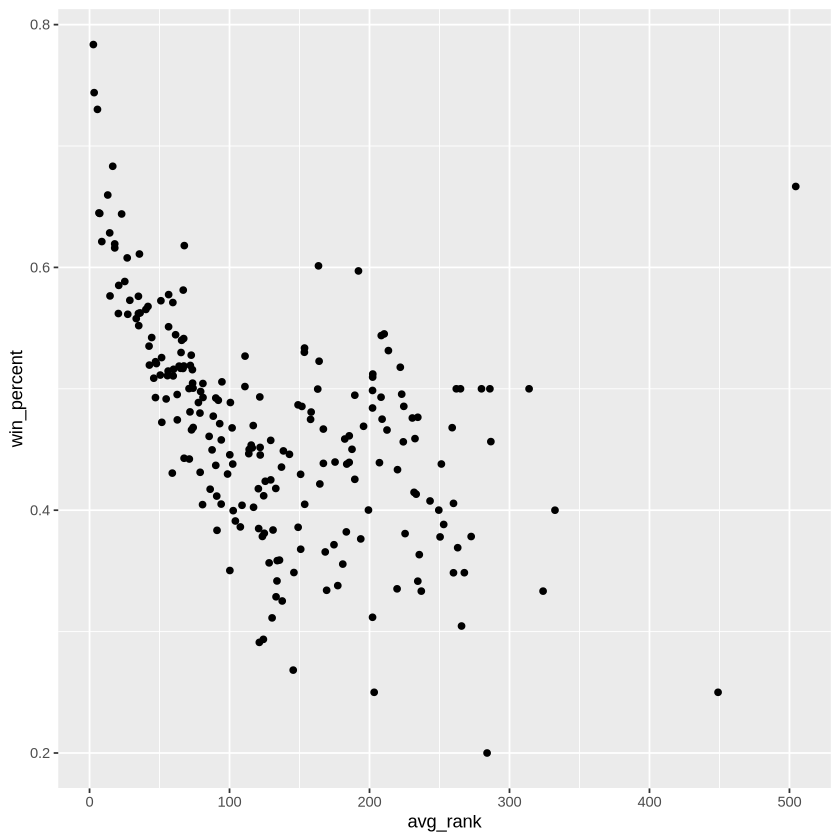

In [125]:

options(repr.matrix.max.rows=30, repr.matrix.max.cols=20)


## Winner rank (of a match)
average_winner_ranks <- players_data |>
    group_by(winner_name) |>
    summarize(avg_rank = mean(winner_rank, na.rm = TRUE),
             avg_win_percent = mean(win_percent, na.rm = TRUE)) |>
    arrange(avg_rank)

## Loser rank (of a match)
average_loser_ranks <- players_data |>
    group_by(loser_name) |>
    summarize(avg_rank = mean(loser_rank, na.rm = TRUE),
             avg_win_percent = mean(win_percent, na.rm = TRUE)) |>
    arrange(avg_rank)




## Combine average loser data and average winner data
merged_ranks <- merge(average_winner_ranks, average_loser_ranks, by.x = 0, by.y = 0) |>
    arrange(avg_rank.x)





player_stats <- data.frame()

## Creating new data frame
for (x in 1:nrow(merged_ranks)) {
    row <- merged_ranks[x, ]
    match <- "FALSE"

    ## Winner and Loser columns are same name, add one row to new data frame
    if (row$winner_name == row$loser_name) {
        
        names <- row$winner_name
        avg_rank <- (row$avg_rank.x + row$avg_rank.y) / 2
        win_percent <- (row$avg_win_percent.x + row$avg_win_percent.y) / 2

        vec <- c(names, avg_rank, win_percent)

        player_stats <- rbind(player_stats, vec, stringsAsFactors = FALSE)
        match <- "TRUE"
    } else {

        ## Search for winner name in loser column and vice versa, if found add one new row with player info to new data frame
        for (y in 1:nrow(merged_ranks)) {
            row2 <- merged_ranks[y, ]
            if (row$winner_name == row2$loser_name) {
                names <- row$winner_name
                avg_rank <- (row$avg_rank.x + row2$avg_rank.y) / 2
                win_percent <- (row$avg_win_percent.x + row2$avg_win_percent.y) / 2

                vec <- c(names, avg_rank, win_percent)
                player_stats <- rbind(player_stats, vec, stringsAsFactors = FALSE)

                match <- "TRUE"
                break
            }

            if (row2$winner_name == row$loser_name) {
                names <- row2$winner_name
                avg_rank <- (row2$avg_rank.x + row$avg_rank.y) / 2
                win_percent <- (row2$avg_win_percent.x + row$avg_win_percent.y) / 2

                vec <- c(names, avg_rank, win_percent)
                player_stats <- rbind(player_stats, vec, stringsAsFactors = FALSE)

                match <- "TRUE"
                break
            }
        }

        ## No match found, add two new rows to new data frame with winner and loser data
        if (match == "FALSE") {

            names <- row$winner_name
            avg_rank <- row$avg_rank.x
            win_percent <- row$avg_win_percent.x
    
            vec <- c(names, avg_rank, win_percent)
            player_stats <- rbind(player_stats, vec, stringsAsFactors = FALSE)
            
            names <- row$loser_name
            avg_rank <- row$avg_rank.y
            win_percent <- row$avg_win_percent.y
    
            vec <- c(names, avg_rank, win_percent)
            player_stats <- rbind(player_stats, vec, stringsAsFactors = FALSE)
        }

    }
}
names(player_stats)[names(player_stats) == "X.Rafael.Nadal."] <- "names"
names(player_stats)[names(player_stats) == "X.2.73355263157895."] <- "avg_rank"
names(player_stats)[names(player_stats) == "X.0.783571649436549."] <- "win_percent"

player_stats <- player_stats |> 
            transform(
                avg_rank = as.numeric(avg_rank),
                win_percent = as.numeric(win_percent)
            ) |>
            distinct()
                

player_stats





## Sample plot of winner_rank vs win_percentage
tennis_plot <- ggplot(player_stats, aes(x=avg_rank, y=win_percent)) +
    geom_point()
tennis_plot

## Methods

Firstly, we imported the tennis database into Jupyter. Then, we will transform our data to better suit our data analysis. Currently, the columns describing the two players of a game are labeled “winner” and "loser”, but we will change their labels to “player 1” and “player 2”. To allow for easier classification, we will create a column titled “winner” and have the variables be either “player 1” or “player 2” to display the player that won. The columns we will use to predict the winner will be a player’s average rank, and a new column called win percentage. To create this new column, we will find a player’s total number of wins and divide it by the total number of games they have played. These columns will be important to our project as they are the strongest indicator that a player will win a game. One way we can visualize our results is by plotting the percent accuracy of our results in a bar graph format and comparing it to the accuracy of a predictor only using player rank and the accuracy of another predictor only using win percentage. By doing this, we can ascertain if our predictor is more accurate than other simpler models. 


## Expected outcomes and significance

We expect to find the winner between two professional tennis players with a greater accuracy than other simpler forms of prediction.These findings could help professional coaches and fans discover players with higher potential and allow them to decide whom to invest their time in. These findings could also lead to future questions such as “Which player will win a certain tournament?” or on a larger scale, we could ask “Which player will be ranked the highest in the future based on their predicted tournament wins?” Overall, we hope that our predictor will be effective at determining the winner of a tennis match and that it will be useful in future applications. 